# Introduction

## Generation of data

Text(0, 0.5, 'y')

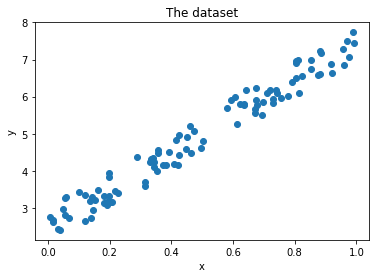

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

X = np.random.rand(100, 1) #Create the input values (d=1)
y = 5*X+2 + np.random.rand(100, 1) #Create output data(labels)

#Visualize the data
plt.scatter(X,y)
plt.title("The dataset")
plt.xlabel("x")
plt.ylabel("y")

## Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Pipeline

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score

######### without pipeline #########
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

X_test = scaler.transform(X_test)
accuracy_score(y_test, lr.predict(X_test))

######### with pipeline #########
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

lr_pipe = make_pipeline(
    StandardScaler(),
    LogisticRegression()
)

lr_pipe.fit(X_train, y_train)
accuracy_score(y_test, lr_pipe.predict(X_test))

1.0


1.0

## Cross-validation

In [19]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lr_pipe, X_train, y_train, cv=5)
score = scores.mean()
print(score)

0.9583333333333334


## Hyperparameter tuning - GridSearchCV

In [27]:
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from scipy.stats import randint

X, y = fetch_california_housing(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y)
param_grid = {'n_estimators': [2, 3],
              'max_depth': [1, 5, 25]}
search = GridSearchCV(estimator=RandomForestRegressor(), param_grid=param_grid)
search.fit(X_train, y_train)
search.best_params_

{'max_depth': 25, 'n_estimators': 3}

## Hyperparameter tuning - RandomizedSearchCV

In [28]:
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from scipy.stats import randint

X, y = fetch_california_housing(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y)
param_distributions = {'n_estimators': randint(1, 10),
                       'max_depth': randint(5, 10)}
search = RandomizedSearchCV(estimator=RandomForestRegressor(), n_iter=5, param_distributions=param_distributions)
search.fit(X_train, y_train)
search.best_params_

{'max_depth': 9, 'n_estimators': 6}

## Bias-variance tradeoff

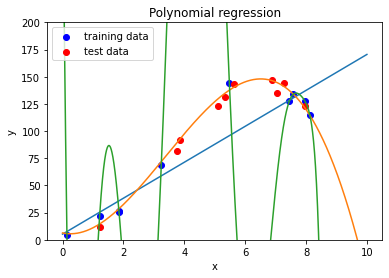

In [14]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = 10*np.random.rand(20, 1) #Create the input values (d=1)
y = -pow(X,3)+10*pow(X,2)-2*X + 20*np.random.rand(20, 1) #Create output data(labels)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)


#Visualize the data
plt.scatter(X_train,y_train, c='blue', label='training data')
plt.scatter(X_test,y_test, c='red', label='test data')
plt.title("Polynomial regression")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

pipe1 = make_pipeline(
        PolynomialFeatures(degree=1),
        LinearRegression()
)
pipe3 = make_pipeline(
        PolynomialFeatures(degree=3),
        LinearRegression()
)
pipe10 = make_pipeline(
        PolynomialFeatures(degree=10),
        LinearRegression()
)
pipe1.fit(X_train, y_train)
pipe3.fit(X_train, y_train)
pipe10.fit(X_train, y_train)
x = np.arange(0,10,0.001).reshape((10000,1))
y1 = pipe1.predict(x)
y3 = pipe3.predict(x)
y10 = pipe10.predict(x)
plt.plot(x, y1)
plt.plot(x, y3)
plt.plot(x,y10)
plt.ylim(0, 200)
plt.savefig('test.png', dpi=1000)

In [15]:
results = np.empty((3,10))

for i in range(1,11):
    pipe = make_pipeline(
        PolynomialFeatures(degree=i),
        LinearRegression()
    )
    pipe.fit(X_train, y_train)
    results[0][i-1] = i
    results[1][i-1] = mean_squared_error(y_train, pipe.predict(X_train))
    results[2][i-1] = mean_squared_error(y_test, pipe.predict(X_test))
    
plt.title("Mean-Squared-Error")
plt.xlabel("Polynomial degree")
plt.ylabel("MSE")
plt.plot(results[0], results[1], label='training error')
plt.plot(results[0], results[2], label='test error')
plt.legend()
plt.ylim(0, 1000)
plt.savefig('test2.png', dpi=1000)

In [4]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

iris = load_iris()
X = iris.data[:, 2:] # petal length and width y = iris.target
y = iris.target

clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X,y)

f = open("/Users/philippgrunter/Downloads/decision-tree.dot", 'w')
export_graphviz(
        clf,
        out_file=f,
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

In [1]:
x = [0,1,2,3,4,5,6,7,8,9]
x[0:2]

[0, 1]